# File Datesets

Explore the use of the Azure ML File Dataset to mount the dataset to compute instance.

## Import libraries
To install OpenCV, open terminal and run the following: 

```bash
conda env list
conda activate azureml_py38_PT_TF
pip install opencv-python
```

In [5]:
import os
from glob import glob
import random
import pandas as pd
import cv2
import numpy as np
import matplotlib.pyplot as plt


from azureml.core import Workspace
from azureml.core import Datastore, Dataset 

In [6]:
mount_point = '/mnt/tmp/cats_dogs'

## Mount a File Dataset
retrieve the dataset from the Azure ML service by name using: 

```python
    Dataset.get_by_name(workspace, <datasetname>)
```

In [7]:
ws = Workspace.from_config()
ds = Dataset.get_by_name(ws, 'cats_dogs')
print(type(ds))

<class 'azureml.data.file_dataset.FileDataset'>


In [8]:
!ls /mnt/tmp -l

total 4
drwxrwxrwt 2 azureuser azureuser 4096 Apr 25 02:42 rstudio-rsession


File datasets can be mounted to compute instances using the `mount` method, which takes a `mount_point` parameter. Then the mount can be started using the `start` method. 


In [9]:
ds_mount = ds.mount(mount_point)
ds_mount.start()

In [10]:
print(ds_mount.mount_point)
print(os.listdir(ds_mount.mount_point))

/mnt/tmp/cats_dogs
['train', 'validation', 'vectorize.py']


In [11]:
!ls /mnt/tmp/cats_dogs -l

total 0
dr-xr-xr-x 2 root root   0 Apr 25 05:04 train
dr-xr-xr-x 2 root root   0 Apr 25 05:04 validation
-r-xr-xr-x 1 root root 140 Apr 23 04:50 vectorize.py


## Plot images from Dataset
Retrieve list of files from mount_point, and plot them as images: 

In [12]:
cats = glob(mount_point + '/train/*/cat.*.jpg')
dogs = glob(mount_point + '/train/*/dog.*.jpg')


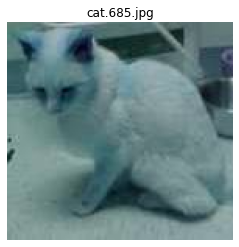

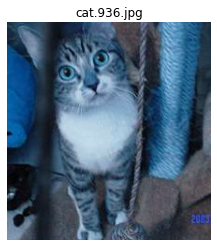

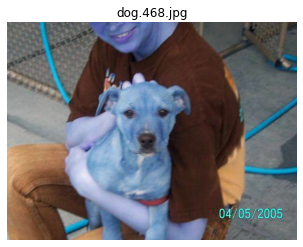

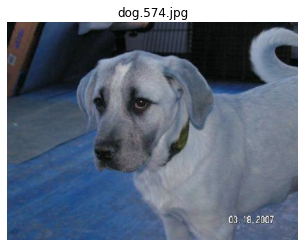

In [15]:
cats_and_dogs = random.sample(cats, 2) + random.sample(dogs, 2)
for fn in cats_and_dogs: 
    img = cv2.imread(fn)
    plt.imshow(img)
    plt.axis('off')
    plt.title(fn.split('/')[-1])
    plt.show()